In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox

In [46]:
df_join = pd.read_csv('twitch_api_data.csv')

In [47]:
df_join

,id,external_rating,aggregated_rating_count,name,target,has_remaster,has_remakes,has_franchise,age_classif,games_developed,...,unknown_game_mode,auditory,bird_view_slash_isometric,first_person,side_view,text,third_person,unknown_player_perspectives,virtual_reality,has_global_launch
0,386,85.333333,13.0,Final Fantasy XIV Online,81.330196,0,0,1,16+,187.0,...,0,0,0,0,0,0,1,0,0,1
1,3241,85.000000,1.0,Cookie Clicker,71.445694,0,0,0,All Ages,3.0,...,0,0,0,0,0,1,0,0,0,1
2,4444,NaN,NaN,The Immortal,75.518951,0,0,0,12+,125.0,...,0,0,0,0,0,0,1,0,0,1
3,5472,61.250000,5.0,50 Cent: Blood on the Sand,58.153653,0,0,0,18+,5.0,...,0,0,0,0,0,0,1,0,0,1
4,9254,83.909091,14.0,Subnautica,83.298475,0,0,0,12+,2.0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,304954,NaN,NaN,State.io,NaN,0,0,0,All Ages,7.0,...,0,0,1,0,0,0,0,0,0,1
1001,305265,NaN,NaN,Emoji Quiz Football,NaN,0,0,0,No Rating,1.0,...,0,0,0,0,1,0,0,0,0,1
1002,303292,NaN,NaN,Cinderella After 4,NaN,0,0,0,No Rating,24.0,...,0,0,0,0,1,1,0,0,0,1
1003,303301,NaN,NaN,MLM Lover,NaN,0,0,0,No Rating,24.0,...,0,0,0,0,1,1,0,0,0,1


In [59]:
# Imputar os valores faltantes na variável alvo
imputer = SimpleImputer(strategy='median')  # Pode escolher 'mean', 'median', etc.
# Separar variáveis preditoras (X) e alvo (y)
X = df_join.drop(columns=['target', 'id', 'name'])
y_median = imputer.fit_transform(df_join[['target']])
y_filed = df_join['target'].fillna(-1)
y = df_join[['target']]
y_log_transformed = np.log1p(y)  # Usando log1p para lidar com valores zero
# Para Box-Cox, os valores devem ser positivos, então adicionamos um pequeno valor constante se necessário
y_shifted = y_filed + 1 - y_filed.min()  # Shifting to make all values positive
y_boxcox_transformed, _ = boxcox(y_shifted)


In [53]:
# Imputar os valores faltantes na variável alvo
# imputer = SimpleImputer(strategy='median')  # Pode escolher 'mean', 'median', etc.
df_join_keep = df_join.dropna(subset='target')
# Separar variáveis preditoras (X) e alvo (y)
X_keep = df_join_keep.drop(columns=['target', 'id', 'name'])
y_keep = df_join_keep['target']


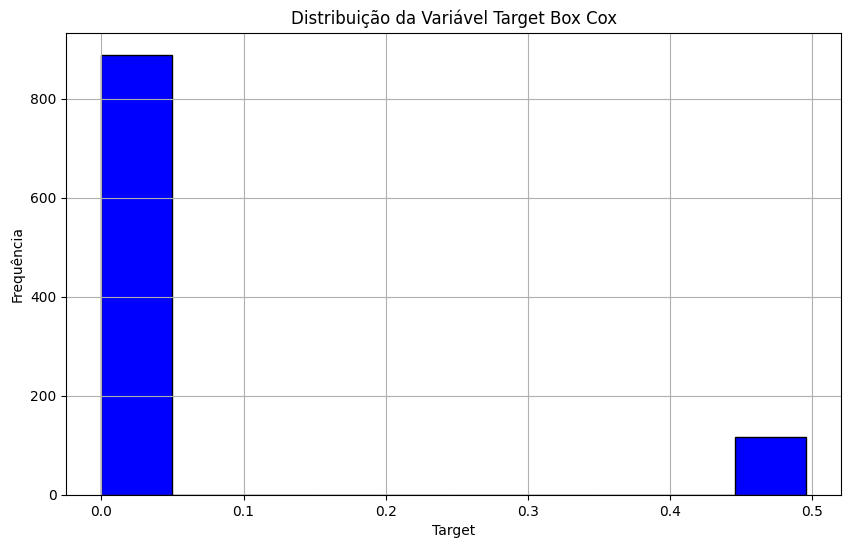

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(y_boxcox_transformed, bins=10, color='blue', edgecolor='black')
plt.title('Distribuição da Variável Target Box Cox')
plt.xlabel('Target')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

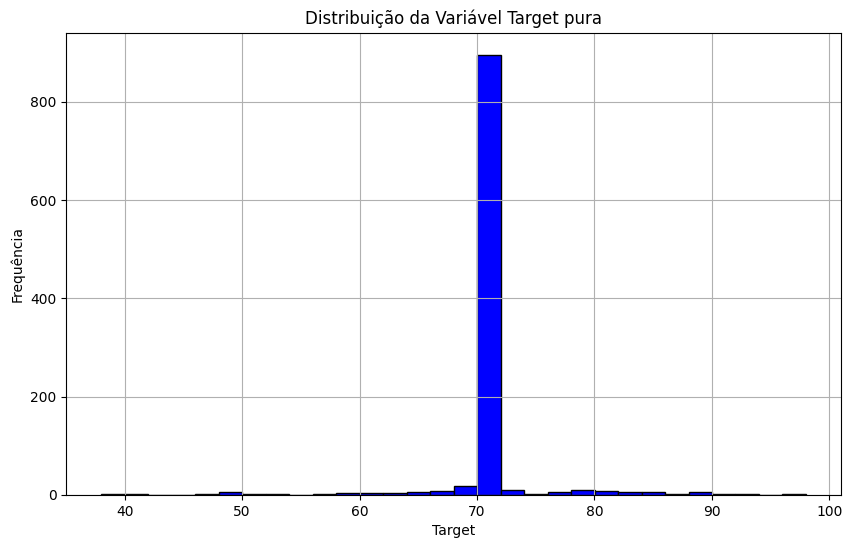

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='blue', edgecolor='black')
plt.title('Distribuição da Variável Target pura')
plt.xlabel('Target')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

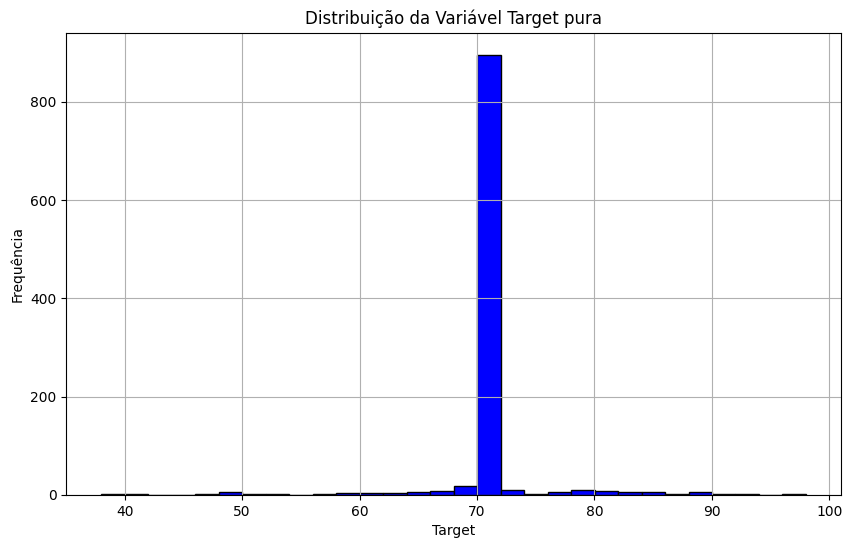

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='blue', edgecolor='black')
plt.title('Distribuição da Variável Target pura')
plt.xlabel('Target')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

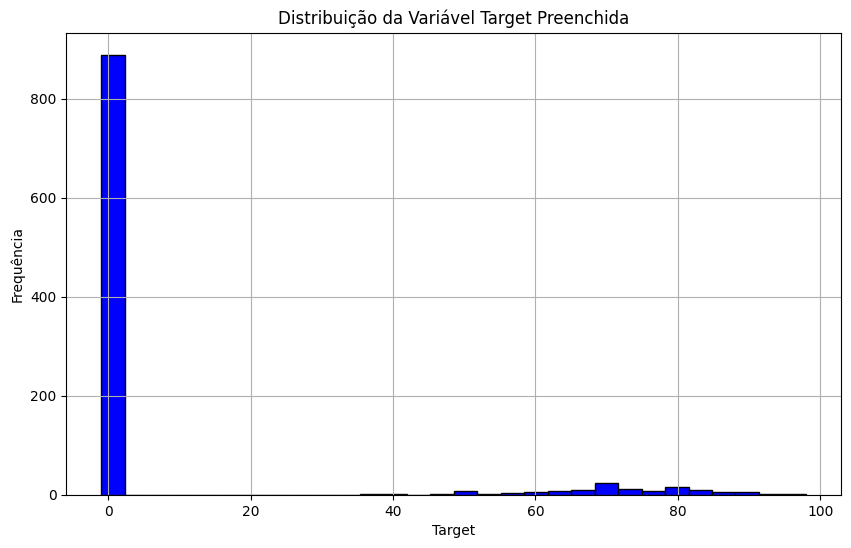

In [55]:
# Plotar a distribuição da variável target
plt.figure(figsize=(10, 6))
plt.hist(y_filed, bins=30, color='blue', edgecolor='black')
plt.title('Distribuição da Variável Target Preenchida')
plt.xlabel('Target')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

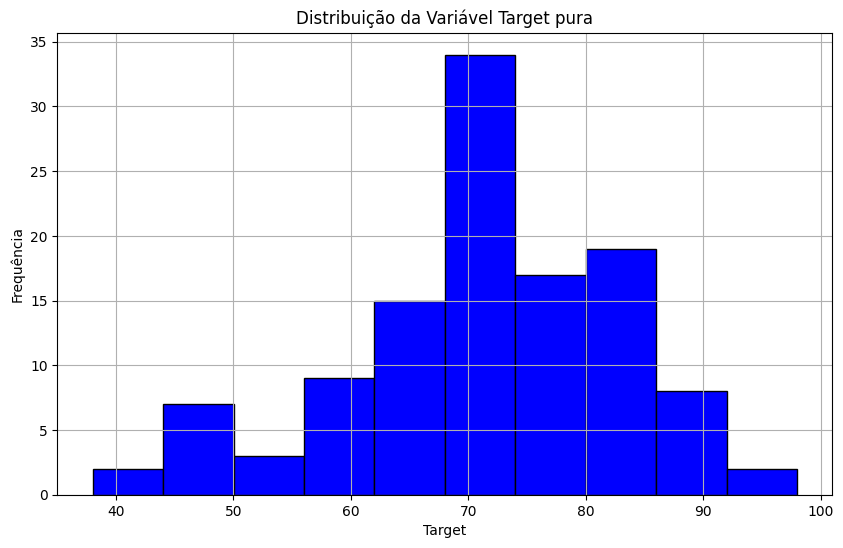

In [63]:
import matplotlib.pyplot as plt
X = df_join.drop(columns=['target', 'id', 'name'])
y = df_join['target']

# Plotar a distribuição da variável target
plt.figure(figsize=(10, 6))
plt.hist(y, bins=10, color='blue', edgecolor='black')
plt.title('Distribuição da Variável Target pura')
plt.xlabel('Target')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

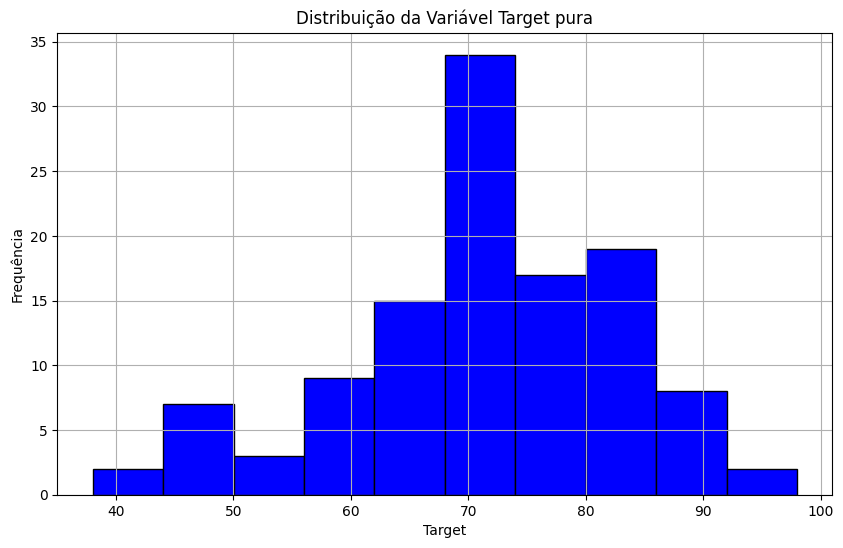

In [64]:
# Plotar a distribuição da variável target
plt.figure(figsize=(10, 6))
plt.hist(y_keep, bins=10, color='blue', edgecolor='black')
plt.title('Distribuição da Variável Target pura')
plt.xlabel('Target')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

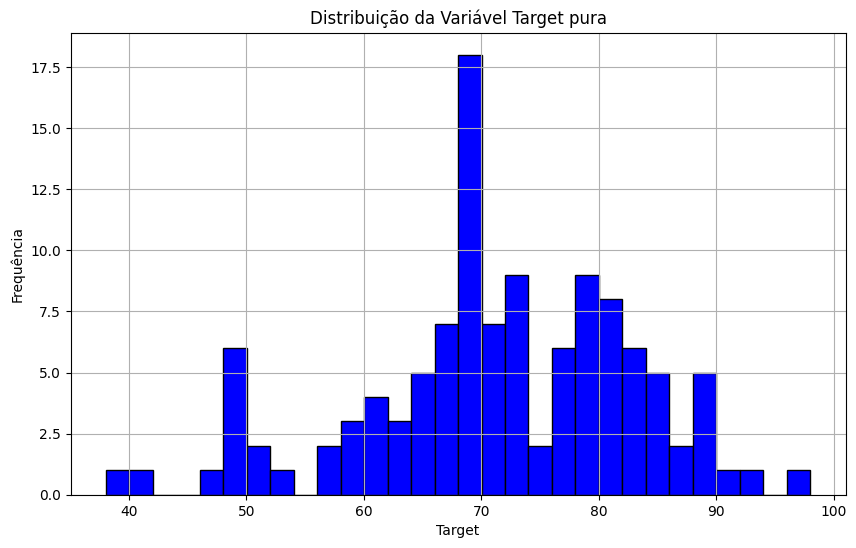

In [ ]:

# Plotar a distribuição da variável target
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='blue', edgecolor='black')
plt.title('Distribuição da Variável Target pura')
plt.xlabel('Target')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

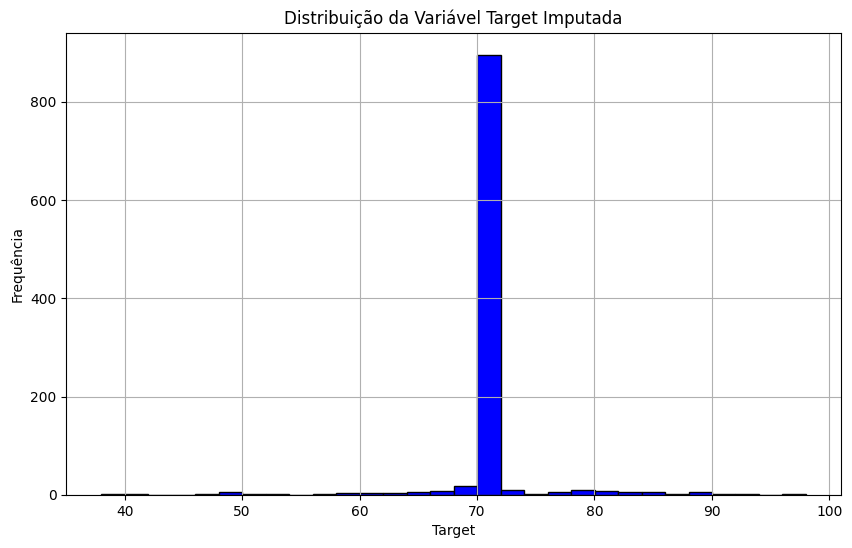

In [31]:
import matplotlib.pyplot as plt
X = df_join.drop(columns=['target', 'id', 'name'])
y = imputer.fit_transform(df_join[['target']])
# Plotar a distribuição da variável target
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='blue', edgecolor='black')
plt.title('Distribuição da Variável Target Imputada')
plt.xlabel('Target')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [22]:


# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Criar pipelines de transformação para colunas numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores em um único ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Identificar colunas numéricas e categóricas
numeric_features = X_keep.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_keep.select_dtypes(include=['object', 'bool']).columns

# Criar pipelines de transformação para colunas numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores em um único ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_keep, y_keep, test_size=0.2, random_state=42)
# Agora vou treinar três modelos diferentes
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
}

results = {}

for name, model in models.items():
    # Criar pipeline com pré-processador e modelo
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Treinar o modelo``
    clf.fit(X_train, y_train)
    
    # Prever no conjunto de teste
    y_pred = clf.predict(X_test)
    
    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R²': r2}

results

{'RandomForest': {'MSE': np.float64(135.34836458483744),
  'R²': 0.27196515827783485}}

In [ ]:
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Agora vou treinar três modelos diferentes
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
}

results = {}

for name, model in models.items():
    # Criar pipeline com pré-processador e modelo
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Treinar o modelo
    clf.fit(X_train, y_train)
    
    # Prever no conjunto de teste
    y_pred = clf.predict(X_test)
    
    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R²': r2}

results

{'RandomForest': {'MSE': np.float64(19.752599714396307),
  'R²': -0.19307806509003678}}

In [ ]:
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Agora vou treinar três modelos diferentes
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
}

results = {}

for name, model in models.items():
    # Criar pipeline com pré-processador e modelo
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Treinar o modelo
    clf.fit(X_train, y_train)
    
    # Prever no conjunto de teste
    y_pred = clf.predict(X_test)
    
    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R²': r2}

results

{'RandomForest': {'MSE': np.float64(19.752599714396307),
  'R²': -0.19307806509003678}}

In [ ]:
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Agora vou treinar três modelos diferentes
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
}

results = {}

for name, model in models.items():
    # Criar pipeline com pré-processador e modelo
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Treinar o modelo
    clf.fit(X_train, y_train)
    
    # Prever no conjunto de teste
    y_pred = clf.predict(X_test)
    
    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R²': r2}

results

{'RandomForest': {'MSE': np.float64(19.752599714396307),
  'R²': -0.19307806509003678}}

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Carregar o arquivo CSV
file_path = 'twitch_api_data_2021.csv'
df = pd.read_csv(file_path)

# # Substituir valores ausentes em colunas numéricas pela mediana
# numerical_columns = ['games_developed', 'games_published', 'onlinecoop', 'onlinecoopmax', 'onlinemax', 'splitscreen']
# for col in numerical_columns:
#     df[col].fillna(df[col].median(), inplace=True)

# # Substituir valores ausentes em colunas categóricas pela moda
# categorical_columns = ['has_parents', 'continent_name']
# for col in categorical_columns:
#     df[col].fillna(df[col].mode()[0], inplace=True)

# Codificar variáveis categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separar os dados em recursos (X) e alvo (y)
X = df.drop(columns=['target', 'id', 'name'])
y = df['target']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, 
    
                                          eval_metric='logloss',        # Ajustado para classificação binária
            objective='binary:logistic',  # Ajustado para classificação binária
                              n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliar o modelo XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

print("Acurácia do XGBoost:", xgb_accuracy)
print("Relatório de classificação do XGBoost:\n", xgb_report)

Acurácia do XGBoost: 0.9253731343283582
Relatório de classificação do XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       181
           1       0.67      0.50      0.57        20

    accuracy                           0.93       201
   macro avg       0.81      0.74      0.77       201
weighted avg       0.92      0.93      0.92       201



/Users/josepaulo/twitter_api/venv_twitch/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:16:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [136]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def process_age_classif(df):
    # Verificar os valores únicos na coluna age_rating
    print("Valores únicos em age_rating:", df['age_classif'].unique())
    
    # Codificar categorias em valores numéricos
    label_encoder = LabelEncoder()
    df['age_rating_encoded'] = label_encoder.fit_transform(df['age_classif'])
    
    # Verificar a codificação
    print("Mapeamento de age_classif para números:")
    for category, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"{category}: {code}")
    
    return df


In [137]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def process_continent_name(df):
    # Verificar os valores únicos na coluna age_rating
    print("Valores únicos em continent_name:", df['continent_name'].unique())
    
    # Codificar categorias em valores numéricos
    label_encoder = LabelEncoder()
    df['continent_name_encoded'] = label_encoder.fit_transform(df['continent_name'])
    
    # Verificar a codificação
    # print("Mapeamento de continent_name para números:")
    # for category, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    #     print(f"{category}: {code}")
    
    return df


In [134]:
# Carregar o dataframe
file_path = 'twitch_api_data_2021.csv'
df = pd.read_csv(file_path)

In [122]:
df

,id,name,has_remaster,target,age_classif,games_developed,has_parents,games_published,continent_name,onlinecoop,...,unknown_game_mode,auditory,bird_view_slash_isometric,first_person,side_view,text,third_person,unknown_player_perspectives,virtual_reality,has_global_launch
0,386,Final Fantasy XIV Online,0,1,16+,187.0,False,962.0,Asia,0.0,...,0,0,0,0,0,0,1,0,0,1
1,4444,The Immortal,0,1,12+,125.0,False,1346.0,North America,NaN,...,0,0,0,0,0,0,1,0,0,1
2,5472,50 Cent: Blood on the Sand,0,1,18+,5.0,False,-1.0,Europe,NaN,...,0,0,0,0,0,0,1,0,0,1
3,9254,Subnautica,0,1,12+,2.0,False,7.0,Unknown,NaN,...,0,0,0,1,0,0,0,0,1,1
4,10239,Ark: Survival Evolved,1,1,18+,13.0,False,13.0,North America,0.0,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,304289,The Backstreets,0,0,No Rating,1.0,False,-1.0,North America,NaN,...,0,0,0,1,0,0,0,0,0,1
997,304340,Danganronpa Croxx: The Beginning of the Despai...,0,0,No Rating,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,0,1,0,0,0,0
998,304342,Hyper Danganronpa Melancholy,0,0,No Rating,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
999,304478,Fog and Sea,0,0,No Rating,3.0,False,3.0,Unknown,NaN,...,0,0,0,0,0,0,0,1,0,1


[0]	train-logloss:0.68356	eval-logloss:0.68444
[1]	train-logloss:0.67366	eval-logloss:0.67524
[2]	train-logloss:0.66447	eval-logloss:0.66690
[3]	train-logloss:0.65578	eval-logloss:0.65918
[4]	train-logloss:0.64673	eval-logloss:0.65034
[5]	train-logloss:0.63805	eval-logloss:0.64182
[6]	train-logloss:0.62948	eval-logloss:0.63404
[7]	train-logloss:0.62093	eval-logloss:0.62657
[8]	train-logloss:0.61329	eval-logloss:0.61991
[9]	train-logloss:0.60683	eval-logloss:0.61469
[10]	train-logloss:0.59891	eval-logloss:0.60722
[11]	train-logloss:0.59139	eval-logloss:0.60009
[12]	train-logloss:0.58389	eval-logloss:0.59347
[13]	train-logloss:0.57670	eval-logloss:0.58679
[14]	train-logloss:0.56953	eval-logloss:0.58019
[15]	train-logloss:0.56284	eval-logloss:0.57386
[16]	train-logloss:0.55572	eval-logloss:0.56780
[17]	train-logloss:0.54926	eval-logloss:0.56174
[18]	train-logloss:0.54311	eval-logloss:0.55576
[19]	train-logloss:0.53701	eval-logloss:0.55038
[20]	train-logloss:0.53085	eval-logloss:0.54523
[2

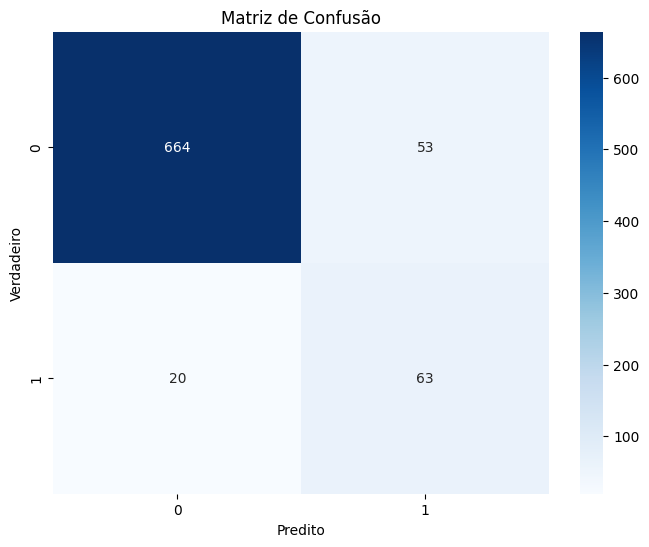


Métricas no Conjunto de Teste:
Acurácia: 0.8855721393034826
ROC AUC: 0.9043650793650794
F1 Score: 0.5818181818181818
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       180
           1       0.47      0.76      0.58        21

    accuracy                           0.89       201
   macro avg       0.72      0.83      0.76       201
weighted avg       0.92      0.89      0.90       201



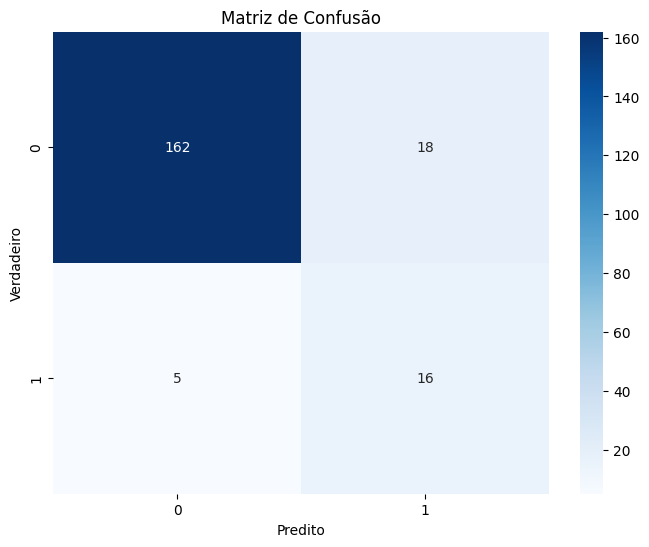

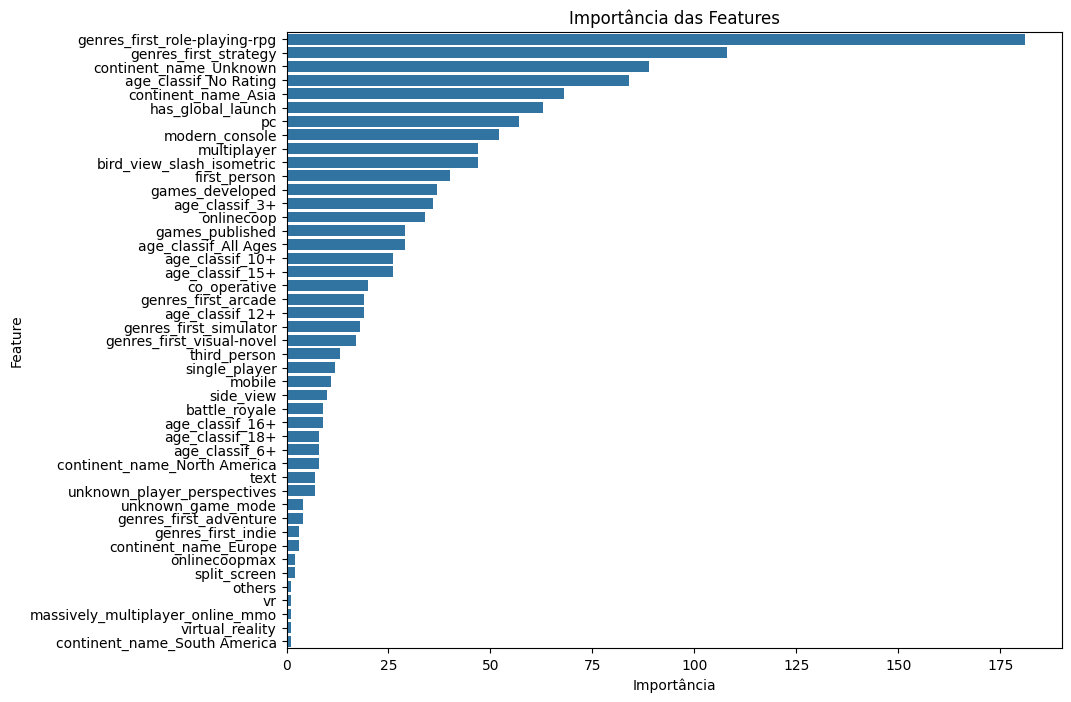

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Para Oversampling
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Função para carregar e preparar os dados
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    # df = process_age_classif(df)
    # df = process_continent_name(df)
    # df.drop(columns=['age_classif','continent_name'])
    
    # Separar a variável alvo (garantir que seja 1D)
    X = df.drop(columns=['target', 'id', 'name'])  # Ajuste se os nomes das colunas forem diferentes
    y = df['target'].values.ravel()  # Garantir que y seja 1D
    
    # Identificar colunas numéricas e categóricas
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    
    # Pipeline para colunas numéricas
    numerical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Imputação de valores ausentes
        ('scaler', StandardScaler())
    ])
    
    # Pipeline para colunas categóricas usando OneHotEncoder
    categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputação de valores ausentes
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoder para variáveis categóricas
    ])
    
    # Aplicar os transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_cols),
            ('cat', categorical_pipeline, categorical_cols)
        ])
    
    return X, y, preprocessor, numerical_cols, categorical_cols

# Função para criar e treinar o modelo
def create_and_train_model(X, y, preprocessor):
    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Aplicar o preprocessamento (imputação de NaNs)
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    # Aplicar SMOTE para lidar com o desbalanceamento
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Preparar os dados para o XGBoost
    dtrain_resampled = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Definir os parâmetros do modelo
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 3,              # Reduzir a profundidade das árvores
        'learning_rate': 0.015,       # Reduzir a taxa de aprendizado para melhor generalização
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'gamma': 1,
        'reg_alpha': 0.35,            # Aumentar a regularização L1
        'reg_lambda': 0.45,           # Aumentar a regularização L2
        'seed': 42
    }
    
    # Treinar o modelo com early stopping
    evals = [(dtrain_resampled, 'train'), (dtest, 'eval')]
    model = xgb.train(params, dtrain_resampled, num_boost_round=200, early_stopping_rounds=10, evals=evals, verbose_eval=True)
    
    # Fazer previsões no conjunto de treino e teste
    y_train_pred = (model.predict(dtrain) > 0.5).astype(int)
    y_test_pred = (model.predict(dtest) > 0.5).astype(int)
    y_train_pred_proba = model.predict(dtrain)
    y_test_pred_proba = model.predict(dtest)
    
    # Avaliar o modelo no conjunto de treino
    print("\nMétricas no Conjunto de Treino:")
    evaluate_model(y_train, y_train_pred, y_train_pred_proba)
    
    # Avaliar o modelo no conjunto de teste
    print("\nMétricas no Conjunto de Teste:")
    evaluate_model(y_test, y_test_pred, y_test_pred_proba)
    
    return model

# Função para avaliar o modelo
def evaluate_model(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    classification_rep = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"Acurácia: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1 Score: {f1}")
    print("Relatório de Classificação:\n", classification_rep)
    
    # Plot da Matriz de Confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

# Função para exibir a importância das features com nomes das variáveis
def plot_feature_importance(model, preprocessor, numerical_cols, categorical_cols):
    # Obter os nomes das features expandidas
    ohe = preprocessor.named_transformers_['cat']['onehot']
    categorical_feature_names = ohe.get_feature_names_out(categorical_cols)
    
    # Combinar nomes das features numéricas e categóricas
    all_feature_names = list(numerical_cols) + list(categorical_feature_names)
    
    # Importância das features
    importance = model.get_score(importance_type='weight')
    
    # Ordenar pela importância
    importance_sorted = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    
    # Plotar a importância das features
    plt.figure(figsize=(10, 8))
    sns.barplot(x=[x[1] for x in importance_sorted], y=[all_feature_names[int(x[0][1:])] for x in importance_sorted])
    plt.title('Importância das Features')
    plt.xlabel('Importância')
    plt.ylabel('Feature')
    plt.show()

# Carregar e preparar os dados
file_path = 'twitch_api_data_2021.csv'
X, y, preprocessor, numerical_cols, categorical_cols = load_and_prepare_data(file_path)

# Criar, treinar e avaliar o modelo
model = create_and_train_model(X, y, preprocessor)

# Exibir a importância das features
plot_feature_importance(model, preprocessor, numerical_cols, categorical_cols)

In [ ]:
url = f"{URL_TWITCH_BASE}/platforms"

# Define os campos a serem selecionados
fields = ["*"]

# Define os filtros a serem aplicados
filters = {"platform_family": "= (playstation)",}

# Chamada da função com paginação
data_frame_release_date_statuses = fetch_data_with_pagination(url, build_query, fields,filters)
data_frame_release_date_statuses

Erro ao obter dados: 400 - [
  {
    "title": "Syntax Error",
    "status": 400,
    "cause": "Expecting a STRING as input, surround your input with quotes starting at \u0027playstation\u0027 expecting {\u0027{\u0027, \u0027f\u0027, \u0027(\u0027, \u0027[\u0027, \u0027true\u0027, \u0027t\u0027, \u0027false\u0027, \u0027null\u0027, \u0027n\u0027"
  }
]


""


In [73]:
y

0       1
1       1
2       1
3       1
4       1
       ..
996     0
997     0
998     0
999     0
1000    0
Name: target, Length: 1001, dtype: int64

Métricas na Nova Base de Dados:
Acurácia: 0.8842911877394636
ROC AUC: 0.8786500067907101
F1 Score: 0.5049180327868853
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      1194
           1       0.40      0.69      0.50       111

    accuracy                           0.88      1305
   macro avg       0.68      0.80      0.72      1305
weighted avg       0.92      0.88      0.90      1305



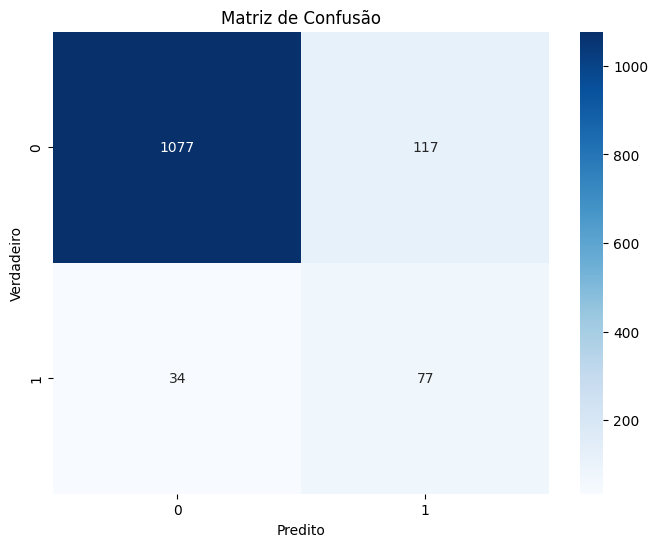

In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb  # Certifique-se de que o xgboost esteja importado

# Função para carregar a nova base de dados e preprocessar
def load_new_data(file_path, preprocessor):
    df = pd.read_csv(file_path)
    
    # Separar as features e a variável alvo
    X_new = df.drop(columns=['target', 'id', 'name'])  # Ajuste se os nomes das colunas forem diferentes
    y_new = df['target'].values.ravel()  # Garantir que y seja 1D
    
    # Aplicar o preprocessamento
    X_new_transformed = preprocessor.transform(X_new)
    
    return df, X_new_transformed, y_new

# Função para avaliar o modelo em novos dados e retornar o DataFrame com probabilidades
def evaluate_on_new_data(model, df, X_new, y_new):
    # Converter os dados para DMatrix
    dnew = xgb.DMatrix(X_new)
    
    # Fazer previsões
    y_new_pred = (model.predict(dnew) > 0.5).astype(int)
    y_new_pred_proba = model.predict(dnew)
    
    # Avaliar o modelo
    print("Métricas na Nova Base de Dados:")
    evaluate_model(y_new, y_new_pred, y_new_pred_proba)
    
    # Adicionar as probabilidades e previsões ao DataFrame original
    df['predicted_class'] = y_new_pred
    df['predicted_proba'] = y_new_pred_proba
    
    return df

# Reutilizando a função evaluate_model para calcular as métricas
def evaluate_model(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    f1 = f1_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"Acurácia: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1 Score: {f1}")
    print("Relatório de Classificação:\n", classification_rep)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

# Caminho para a nova base de dados
new_data_path = 'twitch_api_data_2022.csv'  # Substitua pelo caminho real do arquivo

# Carregar e preprocessar a nova base de dados
df, X_new, y_new = load_new_data(new_data_path, preprocessor)

# Avaliar o modelo na nova base de dados e obter o DataFrame com probabilidades
df_with_predictions = evaluate_on_new_data(model, df, X_new, y_new)

In [12]:
df_with_predictions

,id,name,genres_first,has_remaster,target,age_classif,games_developed,has_parents,games_published,continent_name,...,bird_view_slash_isometric,first_person,side_view,text,third_person,unknown_player_perspectives,virtual_reality,has_global_launch,predicted_class,predicted_proba
0,71,Portal,shooter,0,1,15+,125.0,0.0,1346.0,North America,...,0,1,0,0,0,0,0,1,1,0.827095
1,72,Portal 2,shooter,0,1,12+,86.0,0.0,94.0,North America,...,0,1,0,0,0,0,0,1,1,0.879604
2,1344,Wild Guns,arcade,1,1,12+,12.0,0.0,36.0,Europe,...,0,0,0,0,1,0,0,0,0,0.303285
3,4250,Kingdom: The Far Reaches,adventure,0,0,12+,4.0,0.0,39.0,Unknown,...,0,0,0,0,1,0,0,1,0,0.394169
4,6614,Zero Escape: Virtue's Last Reward,visual-novel,0,1,18+,1.0,0.0,132.0,Europe,...,0,1,0,1,0,0,0,1,1,0.641855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,225446,Dropship Commander,arcade,0,0,All Ages,3.0,0.0,3.0,North America,...,0,0,1,0,0,0,1,1,0,0.366859
1301,250264,Tokyo Pinball,arcade,0,0,No Rating,1.0,0.0,1.0,Unknown,...,1,0,0,0,0,0,0,1,0,0.072245
1302,307160,Tanuki Tales,arcade,0,0,No Rating,1.0,0.0,-1.0,Unknown,...,0,0,0,0,1,0,0,1,0,0.050611
1303,229164,Cubic Light,indie,0,0,3+,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0.084389


In [5]:
import pandas as pd

from sklearn import datasets

from evidently.test_suite import TestSuite
from evidently.test_preset import DataStabilityTestPreset

from evidently.report import Report
from evidently.metric_preset import DataDriftPreset,ClassificationPreset


In [2]:
df_2021 = pd.read_csv('twitch_api_data_2021.csv')
df_2022 = pd.read_csv('twitch_api_data_2022.csv')

In [6]:
model_preset = Report([
    ClassificationPreset()
])

In [ ]:
column_mapping = ColumnMapping()
column_mapping.target = kwargs['target_col']
column_mapping.prediction = kwargs['prediction_col']

In [ ]:
data_drift_report = Report(metrics=[
    DataDriftPreset(),
])

data_drift_report.run(current_data=df_2021.drop(columns=["id","name"]), reference_data=df_2022.drop(columns=["id","name"]), column_mapping=None)
data_drift_report